In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [245]:
"""The dataset of the sequence the cards (cs) were played follows"""
skat_bl_cs_data_path = "C:/Users/sasch/Desktop/Uni/Bachelorarbeit/SaschaBenz/data/dl/bl_skattisch_kf.CSV"

skat_bl_cs_data_frame = pd.read_csv(skat_bl_cs_data_path, header=None)

# TODO: convert data to following encoding:
# ♦, ♥, ♠, ♣, {7, 8, 9, Q, K, 10, A}, J/T
skat_bl_cs_data = skat_bl_cs_data_frame

skat_bl_cs_data.columns = ["GameID", "Sd1", "Sd2", "KNr0", "KNr1", "KNr2", "KNr3", "KNr4", "KNr5", "KNr6", "KNr7",
                           "KNr8", "KNr9", "KNr10", "KNr11", "KNr12", "KNr13", "KNr14", "KNr15", "KNr16", "KNr17",
                           "KNr18", "KNr19", "KNr20", "KNr21", "KNr22", "KNr23", "KNr24", "KNr25", "KNr26", "KNr27",
                           "KNr28", "KNr29", "KNr30", "KNr31", "SurrenderedAt"]

In [246]:
# Sanity Checks

In [247]:
print(skat_bl_cs_data_frame.isna().sum().sum())

0


In [248]:
print(skat_bl_cs_data_frame["GameID"].size)

376344


In [249]:
print(skat_bl_cs_data_frame["GameID"].duplicated().any())

False


In [250]:
skat_bl_table_data = skat_bl_cs_data_frame

head = skat_bl_cs_data.head(n=10)
print(head)


   GameID  Sd1  Sd2  KNr0  KNr1  KNr2  KNr3  KNr4  KNr5  KNr6  ...  KNr23  \
0       1   12   31    21     7    13    11    18    15     9  ...     26   
1       2   31   30     3     7     5     0     6    21     4  ...     22   
2       3    3   13    11    18    28    30     9    19    10  ...      2   
3       4   10   17    24     1    19     3     8    26     0  ...     12   
4       5   10   13    14    12    25     2    28    17    16  ...      9   
5       6   20   28     1     4     2    11    13     0     3  ...      6   
6       7    9   13    16    18    20     9     4    23     7  ...      6   
7       8   28   17    22    19    29     1    28    23    17  ...     10   
8       9   18   20     6    11    10    29     9     8     7  ...     16   
9      11    6   16     0    26     9     3    11     2    30  ...     18   

   KNr24  KNr25  KNr26  KNr27  KNr28  KNr29  KNr30  KNr31  SurrenderedAt  
0      2     20      1      4     24      0     27     31             -1  
1 

In [251]:
"""The table dataset follows"""
skat_bl_table_data_path = "C:/Users/sasch/Desktop/Uni/Bachelorarbeit/SaschaBenz/data/dl/bl_skattisch.CSV"

skat_bl_table_data_frame = pd.read_csv(skat_bl_table_data_path, header=None)

skat_bl_table_data_frame.columns = ["IDTable", "Name", "Number", "PlayerID1", "PlayerID2", "PlayerID3", "PlayerID4",
                                    "Player1", "Player2", "Player3", "Player4", "Date", "IDVServer", "Series"]

skat_bl_table_data_frame

,IDTable,Name,Number,PlayerID1,PlayerID2,PlayerID3,PlayerID4,Player1,Player2,Player3,Player4,Date,IDVServer,Series
0,799a2b2e-ae0f-11da-b3fb-8df7c9751e06,2,1,8687,8628,6449,0,FRED42,MIMO46,AHAB,NaN,1141759244,4,4.0
1,7245a47d-ae0f-11da-b3fb-8df7c9751e06,8,6,25444,32580,39208,0,VERFUERTH KLAUS,DER PATE 39,STOERTEBECKER,NaN,1141759232,4,4.0
2,ffc47bc5-ae0f-11da-b3fb-8df7c9751e06,29,26,59765,49816,37776,0,LUSCHENKING,T.K.,BONNIE PARKER,NaN,1141759469,4,4.0
3,7afc2c30-ae0f-11da-b3fb-8df7c9751e06,34,33,25365,37026,25346,0,PATER,FANTASIO17,KRUEMEL96,NaN,1141759247,4,4.0
4,7cdc0fc3-ae0f-11da-b3fb-8df7c9751e06,33,31,39775,42482,8453,0,HARRYHIRSCH,DIKO98,DOKTORBIER,NaN,1141759250,4,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11919,6x7S67QWV3xRF,T11,3,237339,239742,8662,0,TOTTI 48,ELACHEN,HUGO 1005,NaN,1490724005,4,24242.0
11920,6x7S67QWV3xRO,T8,6,37068,240390,279741,0,WOLLE67,SCHACHSPIELER50,POWERPAUL1,NaN,1490724033,4,24242.0
11921,6x7S67QWV3xRD,T2,13,300814,70362,325948,0,SKAT AMATEUR,ELBE,EDUARD DER ZWEITE,NaN,1490724023,4,24242.0
11922,6x7S67QWV3xRK,T5,11,370619,172135,155110,0,PIKDAME1900,SCHROCKI5,MONSCHI1965,NaN,1490724064,4,24242.0


In [252]:
# Sanity Checks

print(skat_bl_table_data_frame.isna().sum())

IDTable          0
Name             0
Number           0
PlayerID1        0
PlayerID2        0
PlayerID3        0
PlayerID4        0
Player1          0
Player2          0
Player3          0
Player4      11924
Date             0
IDVServer        0
Series           3
dtype: int64


In [253]:
print(skat_bl_table_data_frame["IDTable"].size)

11924


In [254]:
print(skat_bl_table_data_frame["IDTable"].duplicated().any())

False


In [255]:
head = skat_bl_table_data_frame.head(n=10)
print(head)

                                IDTable Name  Number  PlayerID1  PlayerID2  \
0  799a2b2e-ae0f-11da-b3fb-8df7c9751e06    2       1       8687       8628   
1  7245a47d-ae0f-11da-b3fb-8df7c9751e06    8       6      25444      32580   
2  ffc47bc5-ae0f-11da-b3fb-8df7c9751e06   29      26      59765      49816   
3  7afc2c30-ae0f-11da-b3fb-8df7c9751e06   34      33      25365      37026   
4  7cdc0fc3-ae0f-11da-b3fb-8df7c9751e06   33      31      39775      42482   
5  71c3ca4c-ae0f-11da-b3fb-8df7c9751e06   12      15      29758      20755   
6  7478d833-ae0f-11da-b3fb-8df7c9751e06   19      18      23585      11691   
7  729b3e90-ae0f-11da-b3fb-8df7c9751e06   11       8      22429      24313   
8  729990df-ae0f-11da-b3fb-8df7c9751e06   18      16      27957      17169   
9  750b2d25-ae0f-11da-b3fb-8df7c9751e06   35      34      24470      55811   

   PlayerID3  PlayerID4          Player1      Player2        Player3  Player4  \
0       6449          0           FRED42       MIMO46       

In [256]:
"""The game dataset follows"""

skat_bl_game_data_path = "C:/Users/sasch/Desktop/Uni/Bachelorarbeit/SaschaBenz/data/dl/bl_skattisch_spiel.CSV"

skat_bl_game_data_frame = pd.read_csv(skat_bl_game_data_path, header=None)

skat_bl_game_data_frame.columns = ["GameID", "IDGame", "IDTable", "IDVServer", "StartTime", "EndTime", "PlayerFH",
                                   "PlayerMH", "PlayerBH", "Card1", "Card2", "Card3", "Card4", "Card5", "Card6",
                                   "Card7", "Card8", "Card9", "Card10", "Card11", "Card12", "Card13", "Card14",
                                   "Card15", "Card16", "Card17", "Card18", "Card19", "Card20", "Card21", "Card22",
                                   "Card23", "Card24", "Card25", "Card26", "Card27", "Card28", "Card29", "Card30",
                                   "Card31", "Card32", "CallValueFH", "CallValueMH", "CallValueBH", "PlayerID", "Game",
                                   "With", "Without", "Hand", "Schneider", "SchneiderCalled", "Schwarz",
                                   "SchwarzCalled", "Overt", "PointsPlayer", "Won", "Miscall",
                                   "CardPointsPlayer", "AllPassed", "Surrendered", "PlayerPosAtTableFH",
                                   "PlayerPosAtTableMH", "PlayerPosAtTableBH"]

In [257]:
head = skat_bl_game_data_frame.head(n=10)
print(head)

   GameID                                IDGame  \
0       1  9ff1d7c1-ae0f-11da-b3fb-8df7c9751e06   
1       2  c7c48b9e-ae0f-11da-b3fb-8df7c9751e06   
2       3  f2de7b40-ae0f-11da-b3fb-8df7c9751e06   
3       4  269b9093-ae10-11da-b3fb-8df7c9751e06   
4       5  5206ad6f-ae10-11da-b3fb-8df7c9751e06   
5       6  811f68fb-ae10-11da-b3fb-8df7c9751e06   
6       7  baed1441-ae10-11da-b3fb-8df7c9751e06   
7       8  e2598c37-ae10-11da-b3fb-8df7c9751e06   
8       9  0d643994-ae11-11da-b3fb-8df7c9751e06   
9      10  131c7557-ae11-11da-b3fb-8df7c9751e06   

                                IDTable  IDVServer   StartTime     EndTime  \
0  799a2b2e-ae0f-11da-b3fb-8df7c9751e06          4  1141759244  1141759309   
1  799a2b2e-ae0f-11da-b3fb-8df7c9751e06          4  1141759312  1141759376   
2  799a2b2e-ae0f-11da-b3fb-8df7c9751e06          4  1141759379  1141759448   
3  799a2b2e-ae0f-11da-b3fb-8df7c9751e06          4  1141759451  1141759535   
4  799a2b2e-ae0f-11da-b3fb-8df7c9751e06         

In [258]:
skat_bl_game_data_frame[["CallValueFH", "CallValueMH", "CallValueBH", "PlayerID", "Game",
                         "With", "Without", "Hand", "Schneider", "SchneiderCalled", "Schwarz",
                         "SchwarzCalled", "Overt", "PointsPlayer", "Won", "Miscall",
                         "CardPointsPlayer", "AllPassed", "Surrendered"]].describe()

,CallValueFH,CallValueMH,CallValueBH,PlayerID,Game,With,Without,Hand,Schneider,SchneiderCalled,Schwarz,SchwarzCalled,Overt,PointsPlayer,Won,Miscall,CardPointsPlayer,AllPassed,Surrendered
count,407259.000000,407259.000000,407259.000000,407259.000000,407259.000000,407259.000000,407259.000000,407259.000000,407259.000000,407259.000000,407259.000000,407259.000000,407259.000000,407259.000000,407259.000000,407259.000000,407259.000000,407259.000000,407259.0
mean,9.116813,9.139501,9.131648,104217.098650,14.545628,0.921586,0.582651,0.046823,0.268701,0.026791,0.041200,0.025836,0.025834,61.314259,0.786414,0.001299,68.495139,0.075907,0.0
std,11.009870,11.015312,11.012890,94446.125838,8.866425,1.133817,0.938203,0.211259,0.443285,0.161473,0.198752,0.158646,0.158639,79.583084,0.409839,0.036017,31.010530,0.264850,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-530.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,25552.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,1.000000,0.000000,60.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,73002.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.000000,1.000000,0.000000,76.000000,0.000000,0.0
75%,18.000000,18.000000,18.000000,162419.000000,24.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,98.000000,1.000000,0.000000,89.000000,0.000000,0.0
max,96.000000,120.000000,90.000000,394263.000000,59.000000,10.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,314.000000,1.000000,1.000000,120.000000,1.000000,0.0


In [259]:
skat_bl_game_data_frame[["CallValueFH", "CallValueMH", "CallValueBH", "PlayerPosAtTableFH", "PlayerPosAtTableMH",
                         "PlayerPosAtTableBH"]].describe()

,CallValueFH,CallValueMH,CallValueBH,PlayerPosAtTableFH,PlayerPosAtTableMH,PlayerPosAtTableBH
count,407259.000000,407259.000000,407259.000000,407259.000000,407259.000000,407259.000000
mean,9.116813,9.139501,9.131648,1.000037,1.000081,0.999845
std,11.009870,11.015312,11.012890,0.816457,0.816544,0.816514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,18.000000,18.000000,18.000000,2.000000,2.000000,2.000000
max,96.000000,120.000000,90.000000,2.000000,2.000000,2.000000


In [260]:
print(skat_bl_game_data_frame.isna().sum().sum())

0


In [261]:
print(skat_bl_game_data_frame["GameID"].size)

407259


In [262]:
print(skat_bl_game_data_frame["GameID"].duplicated().any())

False


In [263]:
print(skat_bl_game_data_frame["IDGame"].duplicated().any())

False


In [264]:
skat_bl_game_data_frame["Won"].value_counts(normalize=True)

1    0.786414
0    0.213586
Name: Won, dtype: float64

In [265]:
skat_bl_game_data_frame["Schneider"].value_counts(normalize=True)

0    0.731299
1    0.268701
Name: Schneider, dtype: float64

In [266]:
skat_bl_game_data_frame["Schwarz"].value_counts(normalize=True)

0    0.9588
1    0.0412
Name: Schwarz, dtype: float64

In [267]:
skat_bl_game_data_frame["Game"].value_counts()

24    102087
12     81812
11     66704
10     56240
9      47285
0      30914
23     11334
46      9458
59      1028
35       397
Name: Game, dtype: int64

In [268]:
skat_bl_game_data_frame["AllPassed"].value_counts(normalize=True)

0    0.924093
1    0.075907
Name: AllPassed, dtype: float64

In [269]:
skat_bl_game_data_frame["Miscall"].value_counts(normalize=True)

0    0.998701
1    0.001299
Name: Miscall, dtype: float64

In [270]:
skat_bl_game_data_frame["Surrendered"].value_counts(normalize=True)


0    1.0
Name: Surrendered, dtype: float64

In [271]:
skat_bl_game_data_frame["Miscall"].value_counts(normalize=True)

0    0.998701
1    0.001299
Name: Miscall, dtype: float64

In [272]:
# Data Visualisation

In [273]:
# Analysis of games
game_variants = skat_bl_game_data_frame["Game"].value_counts(normalize=True)
game_variants = game_variants.rename(
    index={24: "Grand", 12: "Cross", 11: "Spades", 10: "Hearts", 9: "Diamonds", 0: "AllPassed", 23: "Null",
           46: "Null Ouvert", 59: "Null Ouvert Hand", 35: "Null Hand"})
game_variants

Grand               0.250668
Cross               0.200884
Spades              0.163788
Hearts              0.138094
Diamonds            0.116105
AllPassed           0.075907
Null                0.027830
Null Ouvert         0.023224
Null Ouvert Hand    0.002524
Null Hand           0.000975
Name: Game, dtype: float64

<AxesSubplot:ylabel='Game'>

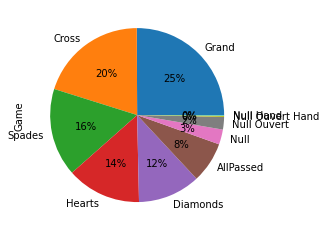

In [274]:
# Create a pie plot showing the relative occurrence of game variants in all games
game_variants.plot(kind="pie", y="Game", autopct='%1.0f%%')

In [275]:
# Filter the games that were won
games_won = skat_bl_game_data_frame[skat_bl_game_data_frame["Won"] == 1]

game_variants_won = games_won["Game"].value_counts(normalize=True)
game_variants_won = game_variants_won.rename(
    index={24: "Grand", 12: "Cross", 11: "Spades", 10: "Hearts", 9: "Diamonds", 0: "AllPassed", 23: "Null",
           46: "Null Ouvert", 59: "Null Ouvert Hand", 35: "Null Hand"})
game_variants_won.loc["AllPassed"] = 0.0
game_variants_won

Grand               0.303309
Cross               0.208084
Spades              0.170198
Hearts              0.143299
Diamonds            0.120640
Null Ouvert         0.027692
Null                0.022731
Null Ouvert Hand    0.003129
Null Hand           0.000918
AllPassed           0.000000
Name: Game, dtype: float64

<AxesSubplot:ylabel='Game'>

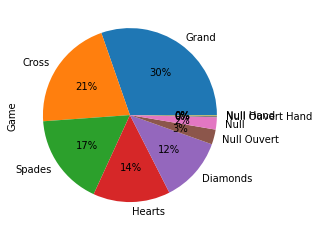

In [276]:
# Create a pie plot showing the relative occurrence of game variants in won games
game_variants_won.plot(kind="pie", y="Game", autopct='%1.0f%%')

In [277]:
# Filter the games that were lost
games_lost = skat_bl_game_data_frame[skat_bl_game_data_frame["Won"] == 0]

game_variants_lost = games_lost["Game"].value_counts(normalize=True)
game_variants_lost = game_variants_lost.rename(
    index={24: "Grand", 12: "Cross", 11: "Spades", 10: "Hearts", 9: "Diamonds", 0: "AllPassed", 23: "Null",
           46: "Null Ouvert", 59: "Null Ouvert Hand", 35: "Null Hand"})
game_variants_lost



AllPassed           0.355395
Cross               0.174375
Spades              0.140185
Hearts              0.118929
Diamonds            0.099408
Grand               0.056849
Null                0.046606
Null Ouvert         0.006771
Null Hand           0.001184
Null Ouvert Hand    0.000299
Name: Game, dtype: float64

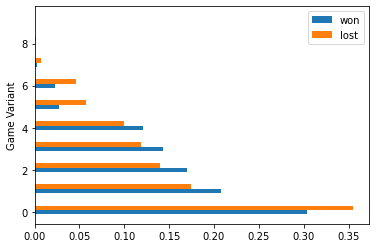

In [278]:
pos = np.arange(10)

fig, ax = plt.subplots()

won = ax.barh(pos, game_variants_won, 0.2, label="won")

lost = ax.barh(pos+0.2, game_variants_lost, 0.2, label="lost")

ax.set_ylabel("Game Variant")
ax.legend()

plt.show()


In [279]:
# Drop the games were all passed for the comparison with the won games
game_variants_lost = game_variants_lost.drop(["AllPassed"])

<AxesSubplot:>

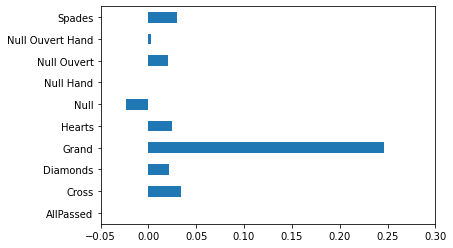

In [280]:
# difference between all game variants and won games
game_difference = game_variants_won - game_variants_lost

game_difference.plot.barh(xlim=[-0.05, 0.3])
# plt.barh(game_difference,)
# plt.show()



In [281]:
# Data Cleansing

In [282]:
# Drop irrelevant information
games_clean = skat_bl_game_data_frame.drop(["IDVServer","StartTime", "EndTime"], axis=1)


In [285]:
# convert data to following encoding:
# ♦, ♥, ♠, ♣, {7, 8, 9, Q, K, 10, A, J}, T
def convert(card, trump):
    vector_rep={
        0: [0,0,0,1,7,0],   # A♣
        1: [0,0,0,1,5,0],   # K♣
        2: [0,0,0,1,4,0],   # Q♣
        3: [0,0,0,1,8,1],   # J♣
        4: [0,0,0,1,6,0],   # 10♣
        5: [0,0,0,1,3,0],   # 9♣
        6: [0,0,0,1,2,0],   # 8♣
        7: [0,0,0,1,1,0],   # 7♣
        8: [0,0,0,1,7,0],   # A♠
        9: [0,0,0,1,5,0],   # K♠
        10: [0,0,1,0,4,0],   # Q♠
        11: [0,0,1,0,8,1],   # J♠
        12: [0,0,1,0,6,0],   # 10♠
        13: [0,0,1,0,3,0],   # 9♠
        14: [0,0,1,0,2,0],   # 8♠
        15: [0,0,1,0,1,0],   # 7♠
        16: [0,1,0,0,7,0],   # A♥
        17: [0,1,0,0,5,0],   # K♥
        18: [0,1,0,0,4,0],   # Q♥
        19: [0,1,0,0,8,1],   # J♥
        20: [0,1,0,0,6,0],   # 10♥
        21: [0,1,0,0,3,0],   # 9♥
        22: [0,1,0,0,2,0],   # 8♥
        23: [0,1,0,0,1,0],   # 7♥
        24: [1,0,0,0,7,0],   # A♦
        25: [1,0,0,0,5,0],   # K♦
        26: [1,0,0,0,4,0],   # Q♦
        27: [1,0,0,0,8,1],   # J♦
        28: [1,0,0,0,6,0],   # 10♦
        29: [1,0,0,0,3,0],   # 9♦
        30: [1,0,0,0,2,0],   # 8♦
        31: [1,0,0,0,1,0]   # 7♦
    }
    converted_card = vector_rep.get(card, "Invalid input")

    # check in a colour game if the card is trump
    if trump == 9:
        if converted_card[0] == 1:
            converted_card[-1] = 1
    elif trump == 10:
        if converted_card[1] == 1:
            converted_card[-1] = 1
    elif trump == 11:
        if converted_card[2] == 1:
            converted_card[-1] = 1
    elif trump == 12:
        if converted_card[3] == 1:
            converted_card[-1] = 1

    return converted_card

trump = 0

games_clean.loc[:, "Card1":"Card32"].head(n=10)

games_clean.loc[:, "Card1":"Card32"] = games_clean.loc[:, "Card1":"Card32"].apply(lambda card_list: card_list.apply(lambda card: convert(card, trump=trump)))

games_clean

# create train and test sets
# skat_train, skat_test = train_test_split(skat_data, test_size=0.2, random_state=0)

# If data set is unsorted and randomly distributed
# train_data = skat_data[:n*0.8]
# test_data = skat_data[n*0.2:]

,GameID,IDGame,IDTable,PlayerFH,PlayerMH,PlayerBH,Card1,Card2,Card3,Card4,...,Overt,PointsPlayer,Won,Miscall,CardPointsPlayer,AllPassed,Surrendered,PlayerPosAtTableFH,PlayerPosAtTableMH,PlayerPosAtTableBH
0,1,9ff1d7c1-ae0f-11da-b3fb-8df7c9751e06,799a2b2e-ae0f-11da-b3fb-8df7c9751e06,8628,6449,8687,"[0, 0, 1, 0, 4, 0]","[1, 0, 0, 0, 8, 1]","[0, 1, 0, 0, 6, 0]","[0, 0, 0, 1, 1, 0]",...,0,98,1,0,112,0,0,1,2,0
1,2,c7c48b9e-ae0f-11da-b3fb-8df7c9751e06,799a2b2e-ae0f-11da-b3fb-8df7c9751e06,6449,8687,8628,"[0, 1, 0, 0, 2, 0]","[1, 0, 0, 0, 1, 0]","[0, 0, 1, 0, 3, 0]","[0, 0, 0, 1, 8, 1]",...,0,146,1,0,100,0,0,2,0,1
2,3,f2de7b40-ae0f-11da-b3fb-8df7c9751e06,799a2b2e-ae0f-11da-b3fb-8df7c9751e06,8687,8628,6449,"[0, 1, 0, 0, 7, 0]","[0, 1, 0, 0, 5, 0]","[1, 0, 0, 0, 7, 0]","[0, 0, 1, 0, 8, 1]",...,0,110,1,0,99,0,0,0,1,2
3,4,269b9093-ae10-11da-b3fb-8df7c9751e06,799a2b2e-ae0f-11da-b3fb-8df7c9751e06,8628,6449,8687,"[0, 0, 1, 0, 6, 0]","[0, 1, 0, 0, 6, 0]","[0, 0, 0, 1, 6, 0]","[0, 0, 0, 1, 3, 0]",...,0,98,1,0,62,0,0,1,2,0
4,5,5206ad6f-ae10-11da-b3fb-8df7c9751e06,799a2b2e-ae0f-11da-b3fb-8df7c9751e06,6449,8687,8628,"[1, 0, 0, 0, 7, 0]","[0, 0, 0, 1, 7, 0]","[0, 1, 0, 0, 1, 0]","[0, 0, 1, 0, 3, 0]",...,0,122,1,0,91,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407254,407255,6x7S67QWV3x6CO,6x7S67QWV3x63V,325948,300814,70362,"[0, 1, 0, 0, 8, 1]","[1, 0, 0, 0, 2, 0]","[0, 0, 0, 1, 2, 0]","[0, 0, 0, 1, 5, 0]",...,0,146,1,0,99,0,0,2,0,1
407255,407256,6x7S67QWV3x6CG,6x7S67QWV3x63V,300814,70362,325948,"[0, 0, 0, 1, 3, 0]","[0, 0, 1, 0, 8, 1]","[0, 0, 1, 0, 2, 0]","[0, 1, 0, 0, 5, 0]",...,0,0,0,0,0,1,0,0,1,2
407256,407257,6x7S67QWV3x6CJ,6x7S67QWV3x63V,325948,300814,70362,"[0, 0, 0, 1, 7, 0]","[0, 1, 0, 0, 7, 0]","[0, 0, 1, 0, 3, 0]","[1, 0, 0, 0, 2, 0]",...,0,0,0,0,0,1,0,2,0,1
407257,407258,6x7S67QWV3x6YV,6x7S67QWV3x63V,300814,70362,325948,"[0, 0, 1, 0, 6, 0]","[0, 0, 0, 1, 4, 0]","[0, 0, 0, 1, 6, 0]","[1, 0, 0, 0, 7, 0]",...,0,74,1,0,77,0,0,0,1,2
